<a href="https://colab.research.google.com/github/Elignesin/SureStart/blob/main/Feb26_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building Autoencoders in Keras
This notebook will be used to learn how to build Autoencoders in Keras. The code comes from the article at https://blog.keras.io/building-autoencoders-in-keras.html, and is not my own.  

Autoencoders have three important properties:
1. They are data specific, meaning they can only compress data like data they were trained on.  
2. They are lossy, meaning outputs will be degraded compared to inputs  
3. They learn automatically from data examples, meaning it doeees not need new engineering to train specialized instances or specific new inputs.

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
#Compile the autoencoder using adam as optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
#We're only going to use the images from MNIST, not the labels
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
#Preprocess the data by flattening it and normalizing it
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
#Train our autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3840 - val_loss: 0.1921
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1809 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1488 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1314 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1207 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1134 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1077 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1036 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1007 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0982 - val_loss: 

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

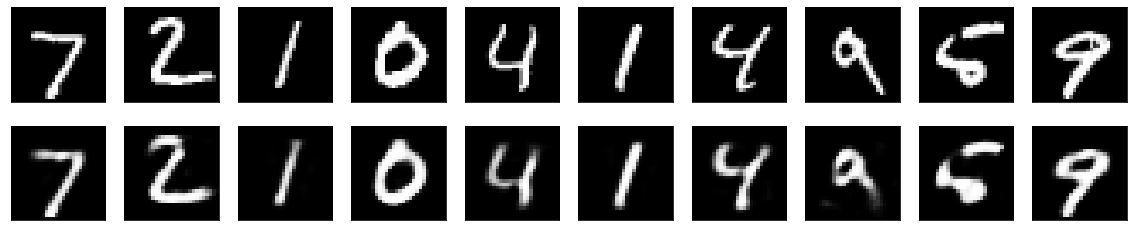

In [9]:
#Display the encoded and decoded images to see how we did
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Now we'll add a sparsity constraint on the encoded representations
This constrains the representations, as opposed to the above constraining via the number of units in the hidden layer. This will make our model less likely to overfit.

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

#Compile the autoencoder using adam as optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Train our autoencoder for 75 epochs
autoencoder.fit(x_train, x_train,
                epochs=75,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/75
235/235 [==============================] - 3s 10ms/step - loss: 0.3893 - val_loss: 0.2000
Epoch 2/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1897 - val_loss: 0.1637
Epoch 3/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1587 - val_loss: 0.1430
Epoch 4/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1414 - val_loss: 0.1313
Epoch 5/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1305 - val_loss: 0.1232
Epoch 6/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1229 - val_loss: 0.1176
Epoch 7/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1179 - val_loss: 0.1138
Epoch 8/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1142 - val_loss: 0.1111
Epoch 9/75
235/235 [==============================] - 2s 9ms/step - loss: 0.1118 - val_loss: 0.1092
Epoch 10/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1103 - val_los

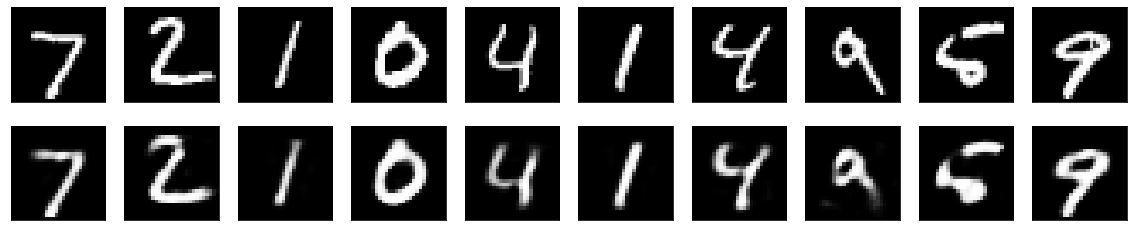

In [11]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

#Display for the sparsity constrained model
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
#This makes for a much deeper encoder, with more dense layers
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Again, we'll train this model on 75 epochs
autoencoder.fit(x_train, x_train,
                epochs=75,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/75
235/235 [==============================] - 4s 15ms/step - loss: 0.3390 - val_loss: 0.1658
Epoch 2/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1572 - val_loss: 0.1339
Epoch 3/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1320 - val_loss: 0.1230
Epoch 4/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1234 - val_loss: 0.1168
Epoch 5/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1172 - val_loss: 0.1116
Epoch 6/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1115 - val_loss: 0.1064
Epoch 7/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1070 - val_loss: 0.1035
Epoch 8/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1044 - val_loss: 0.1011
Epoch 9/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1018 - val_loss: 0.0995
Epoch 10/75
235/235 [==============================] - 3s 14ms/step - loss: 0.1004 - val_lo

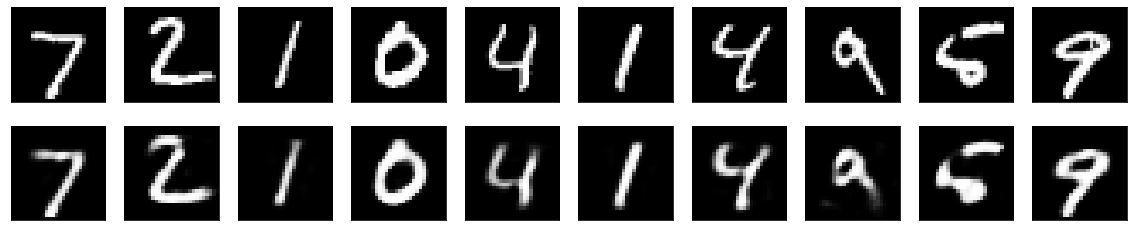

In [13]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

#Display for the "deep" encoder
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
#Next, we'll look at a "convolutional" autoencoder
#This makes more sense because our data is image data
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
#Reload the MNIST data without flattening it
#We can't flatten it because we want to use convolutional networks
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [18]:
#In the article, they use tensorboard for callbacks, but that won't work for some reason
#We're just going to train the model as it is
#I'm also cutting the epochs from 50 to 10 because I'm saving time on this example exercise
#In a real situation, it'd be better to run the 50 epochs here
#tensorboard --logdir=/tmp/autoencoder

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
                )

Epoch 1/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1802 - val_loss: 0.1398
Epoch 2/10
469/469 [==============================] - 87s 187ms/step - loss: 0.1315 - val_loss: 0.1233
Epoch 3/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1209 - val_loss: 0.1162
Epoch 4/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1151 - val_loss: 0.1114
Epoch 5/10
469/469 [==============================] - 87s 187ms/step - loss: 0.1109 - val_loss: 0.1085
Epoch 6/10
469/469 [==============================] - 87s 187ms/step - loss: 0.1079 - val_loss: 0.1055
Epoch 7/10
469/469 [==============================] - 88s 187ms/step - loss: 0.1057 - val_loss: 0.1041
Epoch 8/10
469/469 [==============================] - 88s 187ms/step - loss: 0.1041 - val_loss: 0.1027
Epoch 9/10
469/469 [==============================] - 88s 188ms/step - loss: 0.1028 - val_loss: 0.1013
Epoch 10/10
469/469 [==============================] - 88s 187ms/step - l

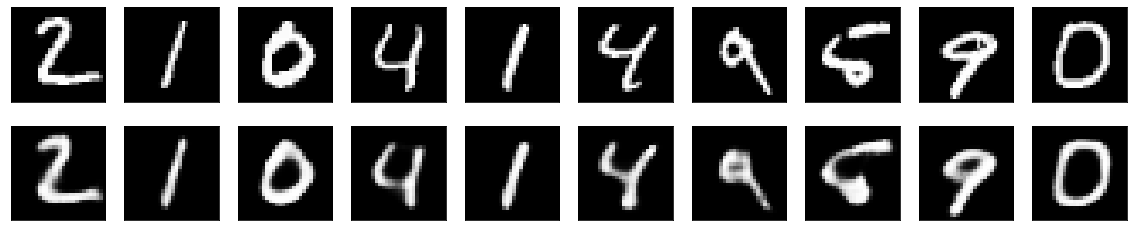

In [19]:
#Now, let's look at some of the reconstructed digits compared to the originals
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

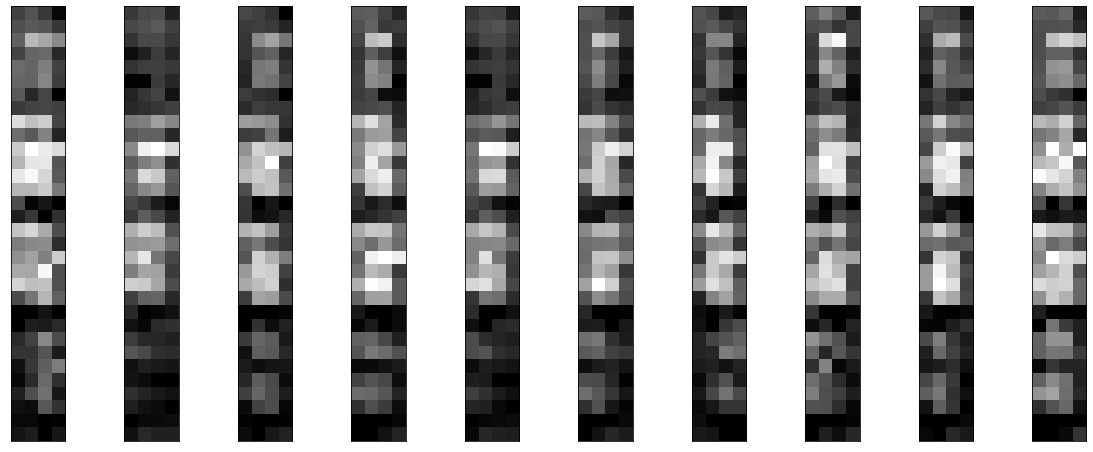

In [20]:
#128 dimensional encoded representations of our images
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Image Denoising Application
One of the most useful applications of autoencoders is in denoising images (mapping from noisy images to clean images)

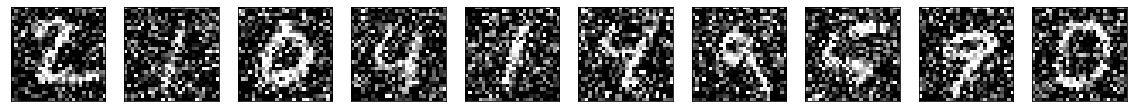

In [21]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
#We're going to use a slightly different model than the other convolutional model above
#As before, I cut the number of epochs because this is practice
#This time, we'll use 10 epochs rather than 100

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]
                )

Epoch 1/10
469/469 [==============================] - 159s 338ms/step - loss: 0.2621 - val_loss: 0.1165
Epoch 2/10
469/469 [==============================] - 159s 338ms/step - loss: 0.1153 - val_loss: 0.1093
Epoch 3/10
469/469 [==============================] - 159s 338ms/step - loss: 0.1086 - val_loss: 0.1052
Epoch 4/10
469/469 [==============================] - 158s 337ms/step - loss: 0.1055 - val_loss: 0.1028
Epoch 5/10
469/469 [==============================] - 158s 337ms/step - loss: 0.1035 - val_loss: 0.1014
Epoch 6/10
469/469 [==============================] - 158s 336ms/step - loss: 0.1023 - val_loss: 0.1007
Epoch 7/10
469/469 [==============================] - 159s 339ms/step - loss: 0.1012 - val_loss: 0.0994
Epoch 8/10
469/469 [==============================] - 158s 337ms/step - loss: 0.1003 - val_loss: 0.0988
Epoch 9/10
469/469 [==============================] - 158s 336ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 10/10
469/469 [==============================] - 157s 336m